In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [4]:
temp = pd.read_csv("Inoculated_Trials_Log.xlsx - Trials.csv")

In [5]:
temp

,ID,Trial,Date,Wind,Collector,Time point,Temp,Cloud cover (%),Colony,Dish,Time,Inoc. Wheatgrass,Inoc. Radish,Wheatgrass,Radish
0,1.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,59.0,1.0,8:36,0.0,0.0,0.0,0.0
1,2.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,60.0,2.0,8:40,0.0,0.0,0.0,0.0
2,3.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,61.0,3.0,8:45,0.0,0.0,0.0,0.0
3,4.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,76.0,4.0,8:50,0.0,0.0,0.0,0.0
4,5.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,77.0,5.0,8:52,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,259.0,6.0,8/19/2020,2.0,Elliott & Noval,24.0,86.0,43.0,97.0,5.0,9:34,10.0,10.0,10.0,10.0
259,260.0,6.0,8/19/2020,2.0,Elliott & Noval,24.0,86.0,43.0,98.0,6.0,9:36,10.0,10.0,10.0,10.0
260,261.0,6.0,8/19/2020,2.0,Elliott & Noval,24.0,86.0,43.0,93.0,7.0,9:38,10.0,10.0,10.0,10.0
261,262.0,6.0,8/19/2020,2.0,Elliott & Noval,24.0,86.0,43.0,101.0,8.0,9:40,10.0,10.0,10.0,10.0


In [6]:
inoc = temp.dropna()

In [7]:
inoc.head()

,ID,Trial,Date,Wind,Collector,Time point,Temp,Cloud cover (%),Colony,Dish,Time,Inoc. Wheatgrass,Inoc. Radish,Wheatgrass,Radish
0,1.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,59.0,1.0,8:36,0.0,0.0,0.0,0.0
1,2.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,60.0,2.0,8:40,0.0,0.0,0.0,0.0
2,3.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,61.0,3.0,8:45,0.0,0.0,0.0,0.0
3,4.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,76.0,4.0,8:50,0.0,0.0,0.0,0.0
4,5.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,77.0,5.0,8:52,0.0,0.0,0.0,0.0


In [8]:
inoc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 262
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                258 non-null    float64
 1   Trial             258 non-null    float64
 2   Date              258 non-null    object 
 3   Wind              258 non-null    float64
 4   Collector         258 non-null    object 
 5   Time point        258 non-null    float64
 6   Temp              258 non-null    float64
 7   Cloud cover (%)   258 non-null    float64
 8   Colony            258 non-null    float64
 9   Dish              258 non-null    float64
 10  Time              258 non-null    object 
 11  Inoc. Wheatgrass  258 non-null    float64
 12  Inoc. Radish      258 non-null    float64
 13  Wheatgrass        258 non-null    float64
 14  Radish            258 non-null    float64
dtypes: float64(12), object(3)
memory usage: 32.2+ KB


In [9]:
kmf_ir = KaplanMeierFitter()
kmf_iw = KaplanMeierFitter()
kmf_w = KaplanMeierFitter()
kmf_r = KaplanMeierFitter()

In [10]:
radish = (inoc['Radish'])
wheatgrass = (inoc['Wheatgrass'])
inocwheat = (inoc['Inoc. Wheatgrass'])
inocradish = (inoc['Inoc. Radish'])

In [11]:
inoc.loc[radish == 10, 'dead_r'] = 1
inoc.loc[radish != 10, 'dead_r'] = 0
inoc.loc[wheatgrass == 10, 'dead_w'] = 1
inoc.loc[wheatgrass != 10, 'dead_w'] = 0
inoc.loc[inocradish == 10, 'dead_ir'] = 1
inoc.loc[inocradish != 10, 'dead_ir'] = 0
inoc.loc[inocwheat == 10, 'dead_iw'] = 1
inoc.loc[inocwheat != 10, 'dead_iw'] = 0
inoc.head()

C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,ID,Trial,Date,Wind,Collector,Time point,Temp,Cloud cover (%),Colony,Dish,Time,Inoc. Wheatgrass,Inoc. Radish,Wheatgrass,Radish,dead_r,dead_w,dead_ir,dead_iw
0,1.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,59.0,1.0,8:36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,60.0,2.0,8:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,61.0,3.0,8:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,76.0,4.0,8:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,1.0,6/29/2020,20.0,Elliott & Noval,0.0,83.0,49.0,77.0,5.0,8:52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
kmf_r.fit(durations = inoc['Time point'], event_observed = inoc['dead_r'])
kmf_w.fit(durations = inoc['Time point'], event_observed = inoc['dead_w'])
kmf_ir.fit(durations = inoc['Time point'], event_observed = inoc['dead_ir'])
kmf_iw.fit(durations = inoc['Time point'], event_observed = inoc['dead_iw'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 258 total observations, 151 right-censored observations>

In [13]:
event_0 = kmf_r.event_table.iloc[0,:]

surv_for_0 = (event_0.at_risk - event_0.observed)/event_0.at_risk

surv_for_0

1.0

In [14]:
event_1 = kmf_r.event_table.iloc[1,:]

surv_for_1 = (event_1.at_risk - event_1.observed)/event_1.at_risk

surv_for_1

0.9365853658536586

In [15]:
event_2 = kmf_r.event_table.iloc[2,:]

surv_for_2 = (event_2.at_risk - event_2.observed)/event_2.at_risk

surv_for_2

0.875

In [16]:
kmf_r.predict([0,1,2,4,24])

0     1.000000
1     0.936585
2     0.819512
4     0.631024
24    0.075723
Name: KM_estimate, dtype: float64

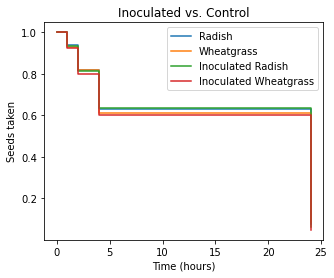

In [17]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)

kmf_r.plot(ci_show = False, label = 'Radish')
kmf_w.plot(ci_show = False, label = 'Wheatgrass')
kmf_ir.plot(ci_show = False, label = 'Inoculated Radish')
kmf_iw.plot(ci_show = False, label = 'Inoculated Wheatgrass')


plt.title("Inoculated vs. Control")
plt.xlabel('Time (hours)')
plt.ylabel('Seeds taken')

plt.savefig('innoculated_seedpref.jpg', bbox_inches='tight', dpi=300)
plt.legend()

# Log Rank Test

In [18]:
event_w = inoc['dead_w']
event_iw = inoc['dead_iw']
time = inoc['Time point']

In [19]:
results=logrank_test(time, time, event_iw, event_w)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.33 0.57      0.82